In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", font="Times New Roman")

In [4]:
data = pd.read_csv("keepass_stats_complete.csv")
data["compression_ratio"] = data.raw_bytes/data.compressed_bytes
data["simple_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_simple
data["advanced_safe_compression_ratio"] = data.raw_bytes/data.safe_compressed_bytes_advanced
data["raw_bytes_kb"] = data.raw_bytes/1000
data["raw_bytes_mb"] = data.raw_bytes/1000000
data.head()

,n,m,dist,random_password,raw_bytes,compressed_bytes,safe_compressed_bytes_simple,safe_compressed_bytes_advanced,unsafe_compressed_bytes_advanced,compression_ratio,simple_safe_compression_ratio,advanced_safe_compression_ratio,raw_bytes_kb,raw_bytes_mb
0,2,100,even,True,307379,16222,18981,17092,NaN,18.948280,16.194036,17.983794,307.379,0.307379
1,2,100,random,True,300970,16459,19072,17282,NaN,18.286044,15.780726,17.415230,300.970,0.300970
2,2,100,long_tail,True,265369,15944,18394,16770,NaN,16.643816,14.426933,15.824031,265.369,0.265369
3,2,200,even,True,611560,30669,35596,31752,NaN,19.940657,17.180582,19.260519,611.560,0.611560
4,2,200,random,True,608671,30423,35454,31742,NaN,20.006936,17.167908,19.175572,608.671,0.608671


In [5]:
mdata = data.drop(columns=["compression_ratio", "simple_safe_compression_ratio", "advanced_safe_compression_ratio"]).melt(id_vars=["n", "m", "dist", "random_password"], value_vars=["compressed_bytes", "safe_compressed_bytes_advanced", "safe_compressed_bytes_simple"])
mdata["value_mb"] = mdata.value/1000000
mdata.head()

,n,m,dist,random_password,variable,value,value_mb
0,2,100,even,True,compressed_bytes,16222,0.016222
1,2,100,random,True,compressed_bytes,16459,0.016459
2,2,100,long_tail,True,compressed_bytes,15944,0.015944
3,2,200,even,True,compressed_bytes,30669,0.030669
4,2,200,random,True,compressed_bytes,30423,0.030423


In [6]:
ndata = data.rename(columns={"compression_ratio": "no partitioning", "advanced_safe_compression_ratio": "physical", "simple_safe_compression_ratio": "logical"}).melt(id_vars=["n", "m", "dist", "random_password"], value_vars=["no partitioning", "physical", "logical"])
ndata["value_mb"] = mdata.value/1000000
ndata.head()

,n,m,dist,random_password,variable,value,value_mb
0,2,100,even,True,no partitioning,18.948280,0.016222
1,2,100,random,True,no partitioning,18.286044,0.016459
2,2,100,long_tail,True,no partitioning,16.643816,0.015944
3,2,200,even,True,no partitioning,19.940657,0.030669
4,2,200,random,True,no partitioning,20.006936,0.030423


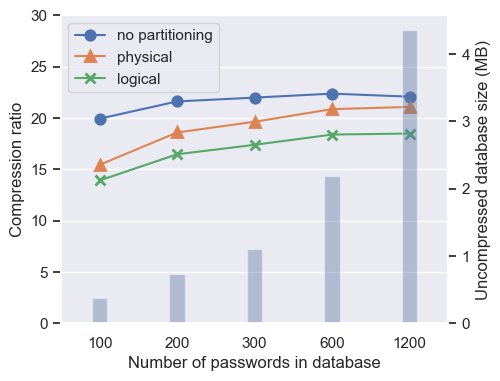

In [7]:
fig = plt.figure(figsize=(5, 4))
ax= fig.gca()
ax2=ax.twinx()
n = 10

# Uncompressed size
sns.barplot(data[(data.dist == "even") & (data.n == n)], x="m", y="raw_bytes_mb", ax=ax2, width=0.2, alpha=0.4)
ax2.set_ylabel("Uncompressed database size (MB)")
ax2.grid(False)

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.n == n)], x="m", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
for l in ax.lines:
    l.set_linewidth(1.5)
ax.set_ybound(0, 30)
ax.set_xlabel("Number of passwords in database")
ax.set_ylabel("Compression ratio")
ax.legend(loc="upper left")

fig.savefig("keepass_m_plot.png", dpi=300, bbox_inches='tight')

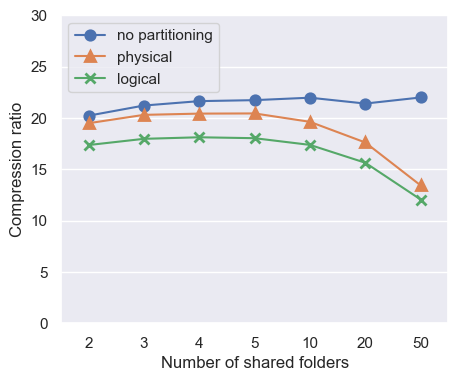

In [8]:
fig = plt.figure(figsize=(5, 4))
ax= fig.gca()
m = 300

# Compression ratio
sns.pointplot(ndata[(ndata.dist == "even") & (ndata.m == m)], x="n", y="value", hue="variable", markers=["o", "^", "x"], ax=ax)
for l in ax.lines:
    l.set_linewidth(1.5)
ax.set_ybound(0, 30)
ax.set_xlabel("Number of shared folders")
ax.set_ylabel("Compression ratio")
ax.legend(loc="upper left")

fig.savefig("keepass_n_plot.png", dpi=300, bbox_inches='tight')

/var/folders/c2/5qbm33b17xzdpm_z05tbc5l00000gn/T/ipykernel_22743/1807702556.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i, j].legend(fontsize="small")
/var/folders/c2/5qbm33b17xzdpm_z05tbc5l00000gn/T/ipykernel_22743/1807702556.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i, j].legend(fontsize="small")


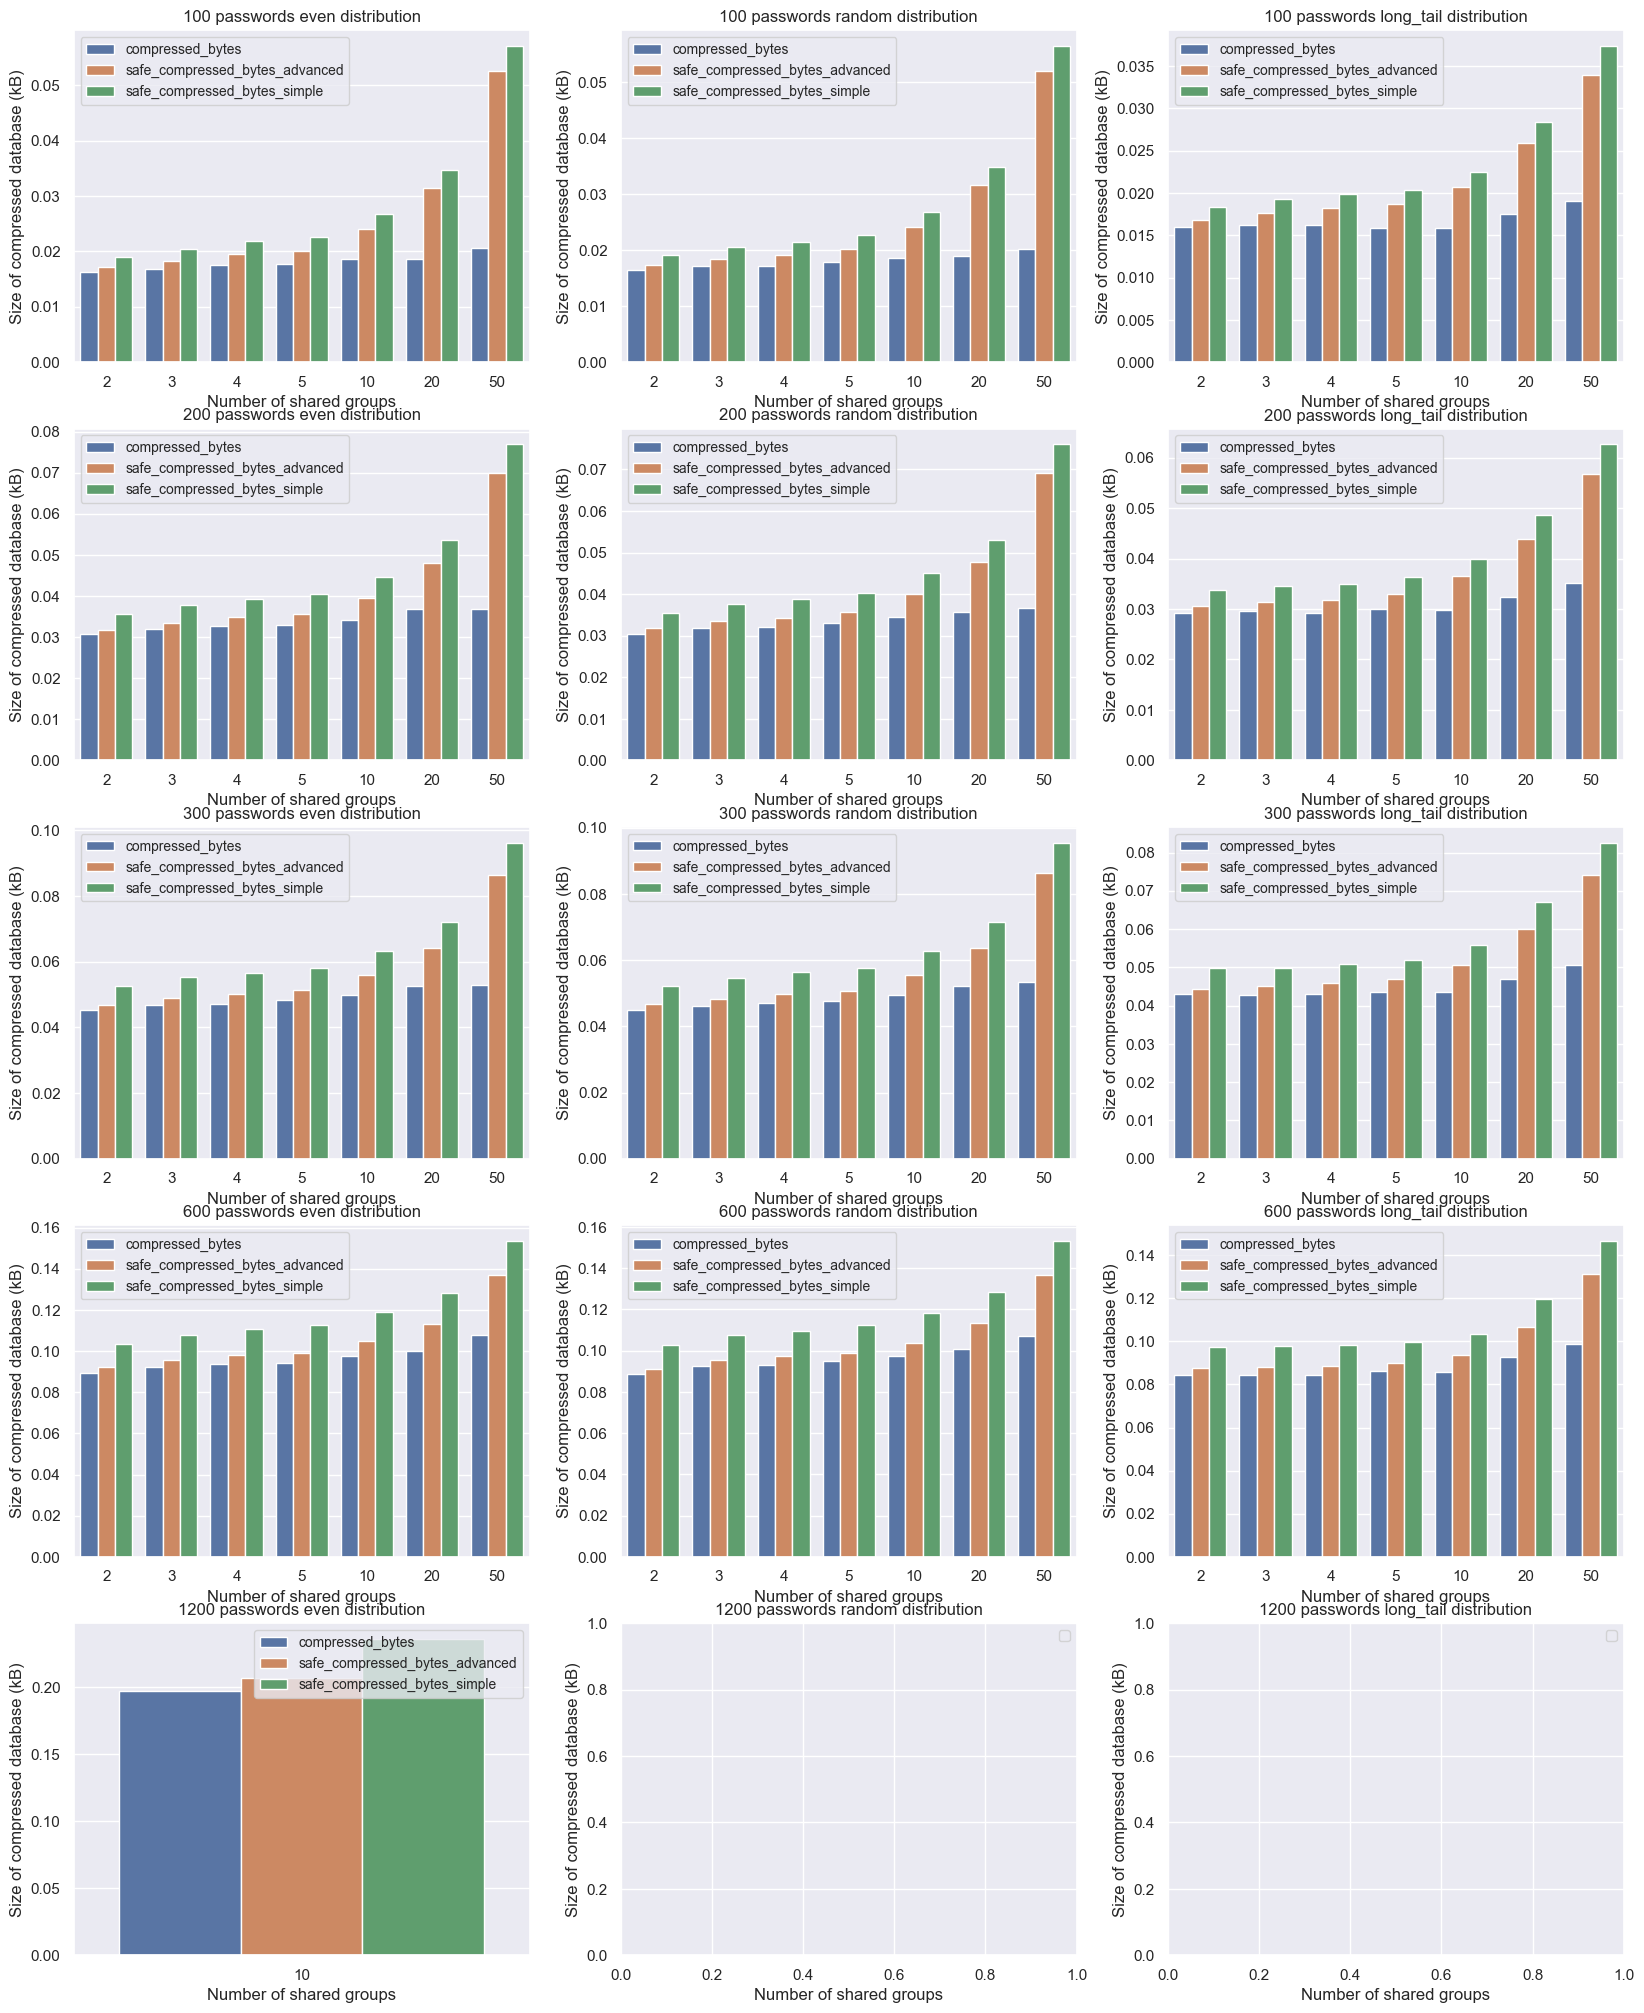

In [10]:
fig, axes = plt.subplots(data.m.nunique(), data.dist.nunique(), figsize=(20, 25))
for i, m in enumerate(data.m.unique()):
    for j, dist in enumerate(data.dist.unique()):
        sns.barplot(mdata[(mdata.m == m) & (mdata.dist == dist)], x="n", y="value_mb", hue="variable", ax=axes[i, j])
        axes[i, j].set_title(f"{m} passwords {dist} distribution")
        axes[i, j].set_xlabel("Number of shared groups")
        axes[i, j].set_ylabel("Size of compressed database (kB)")
        axes[i, j].legend(fontsize="small")